# New York Taxi Trip Duration Prediciton

From EDA, we identified the types of the variables, performed univariate and bivariate analysis and arrived at the conclusion about the data.

As next step, we will start with data preprocessing - missing values treatment, outlier detection.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from datetime import date
from datetime import datetime
import datetime as dt

In [3]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.shape

(729322, 11)

In [5]:
data[data['store_and_fwd_flag'] == 'Y']

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
378,id1347533,1,2016-05-27 18:09:01,2016-05-27 18:16:30,1,-73.976051,40.744671,-73.979721,40.722958,Y,449
400,id2733049,1,2016-03-02 20:05:12,2016-03-02 20:52:52,2,-73.978134,40.757484,-73.998955,40.614380,Y,2860
501,id2484490,1,2016-01-21 08:07:13,2016-01-21 08:18:21,1,-73.999771,40.739487,-73.983940,40.761421,Y,668
644,id2090829,1,2016-01-11 12:10:13,2016-01-11 12:25:41,2,-74.013611,40.714310,-73.976601,40.751938,Y,928
1278,id0512889,1,2016-06-10 21:20:14,2016-06-10 21:26:51,1,-73.958183,40.766190,-73.956032,40.782814,Y,397
1369,id0510811,1,2016-04-07 21:14:30,2016-04-07 21:51:38,1,-73.781944,40.644760,-73.976173,40.670235,Y,2228
1740,id0145424,1,2016-03-26 19:51:48,2016-03-26 20:28:33,3,-73.781090,40.644993,-73.983505,40.757534,Y,2205
1775,id1186235,1,2016-03-02 15:29:30,2016-03-02 15:53:34,1,-73.981911,40.732754,-73.988914,40.763840,Y,1444
2147,id0386498,1,2016-05-08 20:22:58,2016-05-08 20:31:30,1,-73.992294,40.749165,-73.972656,40.755096,Y,512
2364,id2711826,1,2016-01-28 18:51:56,2016-01-28 18:57:14,1,-73.982140,40.778580,-73.987648,40.775585,Y,318


In [6]:
pd.options.display.float_format = '{:.2f}'.format

In [7]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.00,729322.00,729322.00,729322.00,729322.00,729322.00,729322.00
mean,1.54,1.66,-73.97,40.75,-73.97,40.75,952.23
std,0.50,1.31,0.07,0.03,0.07,0.04,3864.63
min,1.00,0.00,-121.93,34.71,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,663.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-65.90,51.88,-65.90,43.92,1939736.00


In [8]:
# From the above, we seems to have some outliers in passenger_count and trip_duration columns

In [9]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [11]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.95,40.78,-73.96,40.77,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.99,40.73,-73.99,40.69,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-74.00,40.72,-73.95,40.77,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.96,40.76,-73.96,40.78,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.02,40.71,-73.99,40.74,N,848


# 1. Extract Features

## Extract Hour from the Pickup and Dropoff time

In [12]:
def get_time_range(inp):
    if inp >= dt.time(5,0,0)and inp < dt.time(7,0,0):
        return 'Early Morning'
    elif inp >= dt.time(7,0,0)and inp < dt.time(11,0,0):
        return 'Morning'
    elif inp >= dt.time(11,0,0)and inp < dt.time(16,0,0):
        return 'Afternoon'
    elif inp >= dt.time(16,0,0)and inp < dt.time(20,0,0):
        return 'Evening'
    elif inp >= dt.time(20,0,0)and inp < dt.time(23,0,0):
        return 'Night'
    else:
        return 'Late Night'

In [13]:
data['pickup_time_range']=data['pickup_datetime'].apply(lambda x :get_time_range(x.time()))
data['dropoff_time_range']=data['dropoff_datetime'].apply(lambda x :get_time_range(x.time()))

In [14]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time_range,dropoff_time_range
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.95,40.78,-73.96,40.77,N,400,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.99,40.73,-73.99,40.69,N,1100,Late Night,Late Night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-74.00,40.72,-73.95,40.77,N,1635,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.96,40.76,-73.96,40.78,N,1141,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.02,40.71,-73.99,40.74,N,848,Early Morning,Early Morning


## Extract Day of Week

In [15]:
data['pickup_day_of_week'] = data['pickup_datetime'].apply(lambda x: x.weekday())
data['dropoff_day_of_week'] = data['dropoff_datetime'].apply(lambda x: x.weekday())

In [16]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time_range,dropoff_time_range,pickup_day_of_week,dropoff_day_of_week
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.95,40.78,-73.96,40.77,N,400,Evening,Evening,0,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.99,40.73,-73.99,40.69,N,1100,Late Night,Late Night,4,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-74.00,40.72,-73.95,40.77,N,1635,Evening,Evening,6,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.96,40.76,-73.96,40.78,N,1141,Morning,Morning,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.02,40.71,-73.99,40.74,N,848,Early Morning,Early Morning,2,2


## Extract Month

In [17]:
data['pickup_month'] = data['pickup_datetime'].apply(lambda x: x.month)
data['dropoff_month'] = data['dropoff_datetime'].apply(lambda x: x.month)

In [18]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time_range,dropoff_time_range,pickup_day_of_week,dropoff_day_of_week,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.95,40.78,-73.96,40.77,N,400,Evening,Evening,0,0,2,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.99,40.73,-73.99,40.69,N,1100,Late Night,Late Night,4,4,3,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-74.00,40.72,-73.95,40.77,N,1635,Evening,Evening,6,6,2,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.96,40.76,-73.96,40.78,N,1141,Morning,Morning,1,1,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.02,40.71,-73.99,40.74,N,848,Early Morning,Early Morning,2,2,2,2


## Calculate the Distance using Latitude and Longtitude

In [19]:
from geopy.distance import geodesic

def calc_dist(row):
    return geodesic((row.pickup_latitude, row.pickup_longitude),
                                   (row.dropoff_latitude, row.dropoff_longitude)).km

In [20]:
data['dist_in_kms'] = data.apply(calc_dist, axis=1)

In [23]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time_range,dropoff_time_range,pickup_day_of_week,dropoff_day_of_week,pickup_month,dropoff_month,dist_in_kms
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.95,40.78,-73.96,40.77,N,400,Evening,Evening,0,0,2,2,1.20
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.99,40.73,-73.99,40.69,N,1100,Late Night,Late Night,4,4,3,3,4.12
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-74.00,40.72,-73.95,40.77,N,1635,Evening,Evening,6,6,2,2,7.25
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.96,40.76,-73.96,40.78,N,1141,Morning,Morning,1,1,1,1,2.36
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.02,40.71,-73.99,40.74,N,848,Early Morning,Early Morning,2,2,2,2,4.33


## Remove the processed features and create a dataset

In [24]:
cols_to_remove = ['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']


trip_data = data.drop(cols_to_remove, axis=1)
trip_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_time_range,dropoff_time_range,pickup_day_of_week,dropoff_day_of_week,pickup_month,dropoff_month,dist_in_kms
0,2,1,N,400,Evening,Evening,0,0,2,2,1.20
1,1,2,N,1100,Late Night,Late Night,4,4,3,3,4.12
2,2,2,N,1635,Evening,Evening,6,6,2,2,7.25
3,2,6,N,1141,Morning,Morning,1,1,1,1,2.36
4,1,1,N,848,Early Morning,Early Morning,2,2,2,2,4.33


# 2. Data Preprocessing

## Check Missing Values

In [26]:
trip_data.isnull().sum()

vendor_id              0
passenger_count        0
store_and_fwd_flag     0
trip_duration          0
pickup_time_range      0
dropoff_time_range     0
pickup_day_of_week     0
dropoff_day_of_week    0
pickup_month           0
dropoff_month          0
dist_in_kms            0
dtype: int64

In [27]:
trip_data.dtypes

vendor_id                int64
passenger_count          int64
store_and_fwd_flag      object
trip_duration            int64
pickup_time_range       object
dropoff_time_range      object
pickup_day_of_week       int64
dropoff_day_of_week      int64
pickup_month             int64
dropoff_month            int64
dist_in_kms            float64
dtype: object

From the above, there are no missing values

## Treating Outliers

### Passenger Count

In [28]:
trip_data['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

From the above, we can see that passenger_count of  0, 9 and 7 has very less data. So, we consider them as outliers and we can 
ignore them.

In [29]:
trip_data = trip_data[(trip_data.passenger_count != 0) & (trip_data.passenger_count <= 6)]
trip_data['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

### Pickup DateTime

In [30]:
trip_data['pickup_month'].value_counts()

3    128309
4    125631
5    124195
2    119356
6    117404
1    114392
Name: pickup_month, dtype: int64

In [31]:
trip_data['dropoff_month'].value_counts()

3    128277
4    125630
5    124230
2    119353
6    117378
1    114366
7        53
Name: dropoff_month, dtype: int64

The pickup_month and dropoff_month data seems to be evenly distributed except for month 7 (July) in dropoff_month. Before we treat this as outlier, lets check the pickup time for month 7 (July).

In [32]:
data['pickup_datetime'][(data.dropoff_month == 7) & (data.pickup_month == 6)].apply(lambda x: x.day).value_counts()

30    53
Name: pickup_datetime, dtype: int64

From the above, we can conclude that for dropoff_month of 7 (July), the pickup was on 6 (June). So the pickup and dropoff month data looks fine and requires no further treatement.

### Trip Duration

From EDA, we know that trip_duration has outliers and to treat it, we need to remove the max value and do log transform to distribute the data evenly.

In [33]:
trip_data = trip_data[trip_data['trip_duration'] != trip_data['trip_duration'].max()]
trip_data = trip_data[trip_data['trip_duration'] != trip_data['trip_duration'].min()]

In [34]:
trip_data['trip_duration'] = np.log(trip_data['trip_duration'])

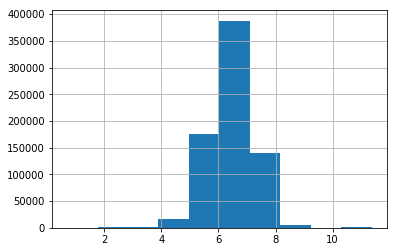

In [35]:
trip_data['trip_duration'].hist()

From the above, we see that the trip duration is equally distributed.

### Remove Outliers based on Bi-Variate Analysis

From the bi-variate analysis, we found the data distribution between trip and distance do not have linear relation. We will treat them below.

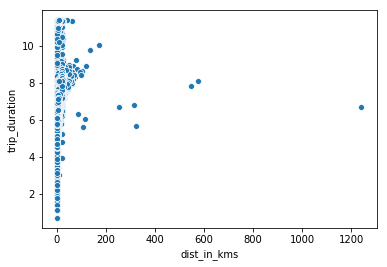

In [36]:
import seaborn as sns

sns.scatterplot(x='dist_in_kms', y='trip_duration', data=trip_data)

From the above, we can see there are outliers. There are lot of trips with distance as 0 and also the distance beyond ~200 kms.

In [37]:
trip_data[trip_data['dist_in_kms'] == 0]['dist_in_kms'].value_counts()

0.00    2889
Name: dist_in_kms, dtype: int64

There are more than 2889 trips with distance as 0 kms. We can either remove or replace it with the mean distance. Since we will remove 2889 row, its better to replace it with mean.

In [38]:
dist_mean = trip_data['dist_in_kms'].mean()
trip_data.loc[trip_data['dist_in_kms'] ==0,'dist_in_kms'] = dist_mean

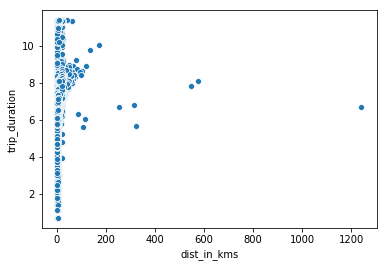

In [39]:
sns.scatterplot(x='dist_in_kms', y='trip_duration', data=trip_data)

We can see shorter trips taking longer time. Lets try log transformation and try to plot the graph.

In [40]:
trip_data['log_dist_in_kms'] = np.log(trip_data['dist_in_kms'])
trip_data['log_trip_duration'] = np.log(trip_data['trip_duration'])

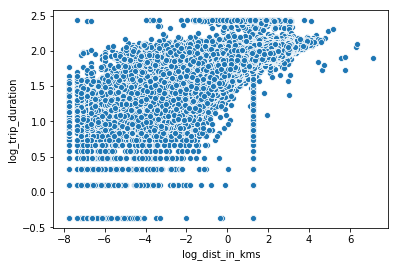

In [41]:
sns.scatterplot(x='log_dist_in_kms', y='log_trip_duration', data=trip_data)

With log transformation, we still see some outliers for trip duration greater than 2.

In [42]:
trip_data = trip_data[(trip_data['log_trip_duration'] < 2) & (trip_data['log_trip_duration'] >= 0.5)]

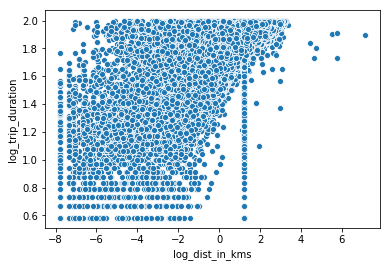

In [43]:
sns.scatterplot(x='log_dist_in_kms', y='log_trip_duration', data=trip_data)

### Convert Categorical columns using One Hot Encoding

In [44]:
cols_to_encode = ['vendor_id', 'store_and_fwd_flag', 'pickup_time_range', 'dropoff_time_range', 
                  'pickup_day_of_week', 'dropoff_day_of_week', 'pickup_month', 'dropoff_month']


trip_data = pd.get_dummies(trip_data, columns=cols_to_encode)

In [45]:
trip_data.head()

,passenger_count,trip_duration,dist_in_kms,log_dist_in_kms,log_trip_duration,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_time_range_Afternoon,...,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7
0,1,5.99,1.20,0.18,1.79,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,7.00,4.12,1.42,1.95,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6,7.04,2.36,0.86,1.95,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,6.74,4.33,1.47,1.91,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2,7.28,3.12,1.14,1.99,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## 2. Create Train and Test Data

In [113]:
target_col = 'trip_duration'
# 'log_dist_in_kms',
pred_cols = ['passenger_count', 'log_dist_in_kms',
'vendor_id_1', 'vendor_id_2',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'pickup_time_range_Afternoon', 'pickup_time_range_Early Morning',
       'pickup_time_range_Evening', 'pickup_time_range_Late Night',
       'pickup_time_range_Morning', 'pickup_time_range_Night',
       'dropoff_time_range_Afternoon', 'dropoff_time_range_Early Morning',
       'dropoff_time_range_Evening', 'dropoff_time_range_Late Night',
       'dropoff_time_range_Morning', 'dropoff_time_range_Night',
       'pickup_day_of_week_0', 'pickup_day_of_week_1', 'pickup_day_of_week_2',
       'pickup_day_of_week_3', 'pickup_day_of_week_4', 'pickup_day_of_week_5',
       'pickup_day_of_week_6', 'dropoff_day_of_week_0',
       'dropoff_day_of_week_1', 'dropoff_day_of_week_2',
       'dropoff_day_of_week_3', 'dropoff_day_of_week_4',
       'dropoff_day_of_week_5', 'dropoff_day_of_week_6', 'pickup_month_1',
       'pickup_month_2', 'pickup_month_3', 'pickup_month_4', 'pickup_month_5',
       'pickup_month_6', 'dropoff_month_1', 'dropoff_month_2',
       'dropoff_month_3', 'dropoff_month_4', 'dropoff_month_5',
       'dropoff_month_6', 'dropoff_month_7']

In [114]:
x = trip_data[pred_cols]
y = trip_data[target_col]
x.shape, y.shape

((654183, 45), (654183,))

In [115]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=56)

## 3. Creating baseline model

Lets create a baseline model using the mean of the trip_duration

In [116]:
mean_pred=np.repeat(train_y.mean(),len(test_y))
mean_pred

array([6.32153242, 6.32153242, 6.32153242, ..., 6.32153242, 6.32153242,
       6.32153242])

In [117]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
sqrt(mse(test_y,mean_pred))

0.6684857682986072

RMSE for baseline model is 0.66. Now, we will use Linear Regression algorithm to better the baseline.

## 4. Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression as LR

In [119]:
lr = LR(normalize=True)

In [120]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [121]:
# prediction over the test data set and calculate error
train_predict = lr.predict(train_x)
err_train = mse(train_predict, train_y)
print ('Training RMSE: ', err_train)

Training RMSE:  0.19422183448535213


In [122]:
# prediction over the test data set and calculate error
test_predict = lr.predict(test_x)
err_test = mse(test_predict, test_y)
print ('Testing RMSE: ', err_test)

Testing RMSE:  0.19507979032496875


From the above, we can see that the RMSE of 0.19, which is better than our model RMSE.

### Calculate the Residuals

In [123]:
residuals = pd.DataFrame({'fitted_values': test_y, 'predicted_values': test_predict})
residuals['residues'] = residuals['fitted_values'] - residuals['predicted_values']
residuals.head()

,fitted_values,predicted_values,residues
328888,7.38,7.54,-0.15
95631,5.99,6.09,-0.10
239447,5.51,5.97,-0.46
684968,5.85,5.87,-0.01
543350,6.66,6.52,0.15


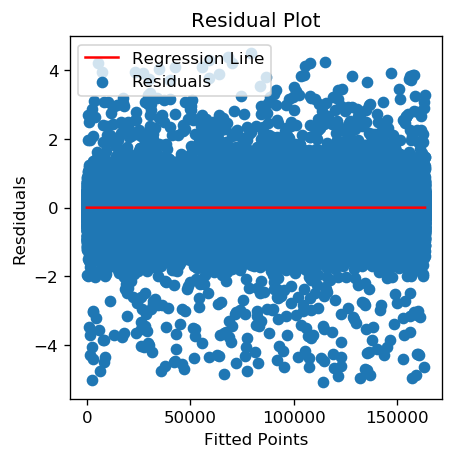

In [183]:
plt.figure(figsize=(4,4), dpi=120, facecolor='w', edgecolor='b')
f = range(0, test_y.shape[0])
k = [0 for i in range(0, test_y.shape[0])]
plt.scatter(f, residuals.residues[:], label='Residuals')
plt.plot(f, k, color='red', label='Regression Line')
plt.xlabel('Fitted Points')
plt.ylabel('Resdiduals')
plt.title('Residual Plot')
#plt.ylim(-4000, 4000)
plt.legend()

There are no patterns in the residuals/errors or any correlations. Variance of errors across the dataset is nearly constant.
We can conclude that the residuals are clearly homoscedastic.

### Plotting the Distribution of Residual Errors

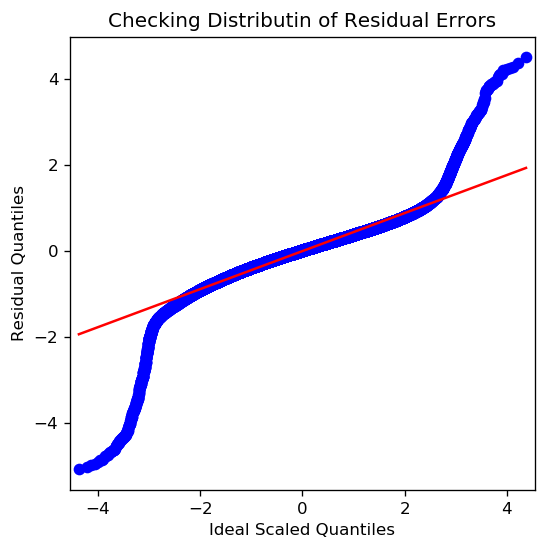

In [125]:
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
qqplot(residuals.residues, line='s', ax=ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.ylabel('Residual Quantiles')
plt.title('Checking Distributin of Residual Errors')
plt.show()

### Checking for Multicollinearity using VIF (Variabale Inflation Factor)

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# calculating VIF for every column (only works for non categorical)
VIF = pd.Series([variance_inflation_factor(trip_data.drop(['dist_in_kms', 'log_trip_duration'], axis=1).values, i) for i in range(trip_data.drop(['dist_in_kms', 'log_trip_duration'], axis=1).shape[1])], index=trip_data.drop(['dist_in_kms', 'log_trip_duration'], axis=1).columns)
VIF

passenger_count                    1.09
trip_duration                      2.30
log_dist_in_kms                    2.34
vendor_id_1                         inf
vendor_id_2                         inf
store_and_fwd_flag_N                inf
store_and_fwd_flag_Y                inf
pickup_time_range_Afternoon         inf
pickup_time_range_Early Morning     inf
pickup_time_range_Evening           inf
pickup_time_range_Late Night        inf
pickup_time_range_Morning           inf
pickup_time_range_Night             inf
dropoff_time_range_Afternoon        inf
dropoff_time_range_Early Morning    inf
dropoff_time_range_Evening          inf
dropoff_time_range_Late Night       inf
dropoff_time_range_Morning          inf
dropoff_time_range_Night            inf
pickup_day_of_week_0                inf
pickup_day_of_week_1                inf
pickup_day_of_week_2                inf
pickup_day_of_week_3                inf
pickup_day_of_week_4                inf
pickup_day_of_week_5                inf


There are no independent variables whose value is more than 5. Hence there are no features that exhibit Multicollinearity.

### Plotting the Coefficients

Text(0.5, 1.0, 'Normalized Coefficient Plot')

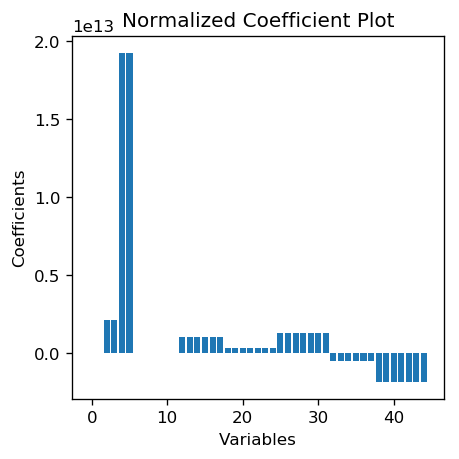

In [140]:
plt.figure(figsize=(4,4), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient Plot')

From the above plot, there are some columns which are near zero and are not significant.

### Lets Retrain the Model using the Coefficients that are significant

In [142]:
coefficients = pd.DataFrame({'Variable': train_x.columns, 'Coefficienct': lr.coef_})
coefficients

,Variable,Coefficienct
0,passenger_count,0.01
1,log_dist_in_kms,0.61
2,vendor_id_1,2091714047961.93
3,vendor_id_2,2091714047961.93
4,store_and_fwd_flag_N,19270608810504.07
5,store_and_fwd_flag_Y,19270608810504.05
6,pickup_time_range_Afternoon,15009659909.41
7,pickup_time_range_Early Morning,15009659909.17
8,pickup_time_range_Evening,15009659909.28
9,pickup_time_range_Late Night,15009659908.99


In [167]:
### Creating dataframe and rank columns using Coefficient

In [150]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = train_x.columns
ranking_df['Rank'] = lr.coef_

In [151]:
ranked = ranking_df.sort_values(by=['Rank'])
ranked

,Feature_name,Rank
38,dropoff_month_1,-1883461814566.75
39,dropoff_month_2,-1883461814566.61
40,dropoff_month_3,-1883461814566.53
41,dropoff_month_4,-1883461814566.43
42,dropoff_month_5,-1883461814566.29
43,dropoff_month_6,-1883461814566.06
44,dropoff_month_7,-1883461814565.88
37,pickup_month_6,-506739739338.64
36,pickup_month_5,-506739739338.41
35,pickup_month_4,-506739739338.27


### Creating a subset of data by ignoring columns that are not significant

In [172]:
x = trip_data[pred_cols]
y = trip_data[target_col]
x.shape, y.shape

((654183, 45), (654183,))

In [175]:
sig_var = coefficients[coefficients.Coefficienct >= 0.61]
sig_var

,Variable,Coefficienct
1,log_dist_in_kms,0.61
2,vendor_id_1,2091714047961.93
3,vendor_id_2,2091714047961.93
4,store_and_fwd_flag_N,19270608810504.07
5,store_and_fwd_flag_Y,19270608810504.05
6,pickup_time_range_Afternoon,15009659909.41
7,pickup_time_range_Early Morning,15009659909.17
8,pickup_time_range_Evening,15009659909.28
9,pickup_time_range_Late Night,15009659908.99
10,pickup_time_range_Morning,15009659909.49


In [157]:
subset = trip_data[sig_var['Variable'].values]
subset.head()

,log_dist_in_kms,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_time_range_Afternoon,pickup_time_range_Early Morning,pickup_time_range_Evening,pickup_time_range_Late Night,pickup_time_range_Morning,...,pickup_day_of_week_4,pickup_day_of_week_5,pickup_day_of_week_6,dropoff_day_of_week_0,dropoff_day_of_week_1,dropoff_day_of_week_2,dropoff_day_of_week_3,dropoff_day_of_week_4,dropoff_day_of_week_5,dropoff_day_of_week_6
0,0.18,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.42,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0.86,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1.47,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1.14,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


## Implement Linear Regression on Subset of Independent Variables

In [176]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(subset, y, random_state=56)

In [177]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [178]:
# creating instance of Linear Regression
lr = LR(normalize=True)

In [179]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [180]:
train_predict = lr.predict(train_x)
err_train = mse(train_predict, train_y)
print ('Training RMSE: ', err_train)

Training RMSE:  0.19463541147780122


In [181]:
test_predict = lr.predict(test_x)
err_test = mse(test_predict, test_y)
print ('Testing RMSE: ', err_test)

Testing RMSE:  0.19551487684905108


Text(0.5, 1.0, 'Coefficient Plot')

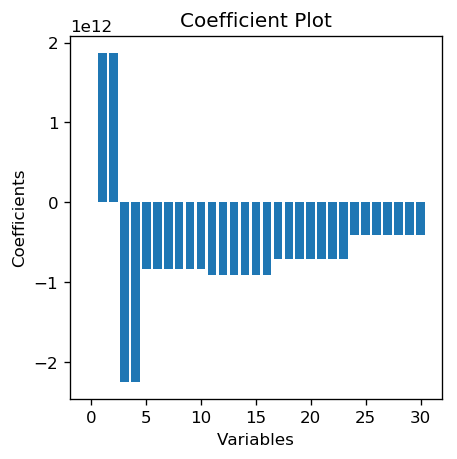

In [182]:
plt.figure(figsize=(4, 4), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient Plot')

## 4. Conclusion

Both the regression model with all the columns and subset of the columns performed well.
We can conclude that the regression model with all the columns performed slightly better than the subset of columns.

## 5. Next Steps
- Could try to use the KFold Cross Validation